Dataset shape: (1259, 27)

Dataset columns:
['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']
Dataset Overview:
Number of samples: 1259
Number of features: 27

Data Types:
object     26
float64     1
Name: count, dtype: int64
Target Variable Analysis (Treatment):
treatment
Yes    637
No     622
Name: count, dtype: int64


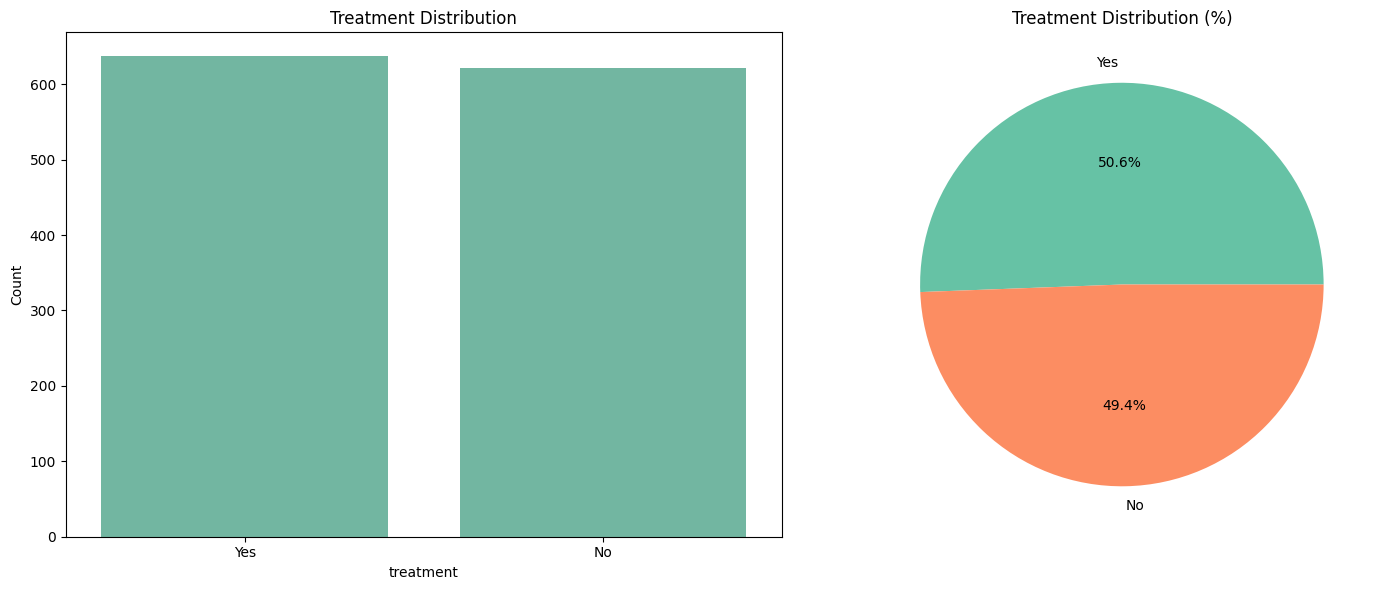


Class balance ratio: 0.976
✅ Dataset is reasonably balanced.
Age Distribution Analysis:
count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


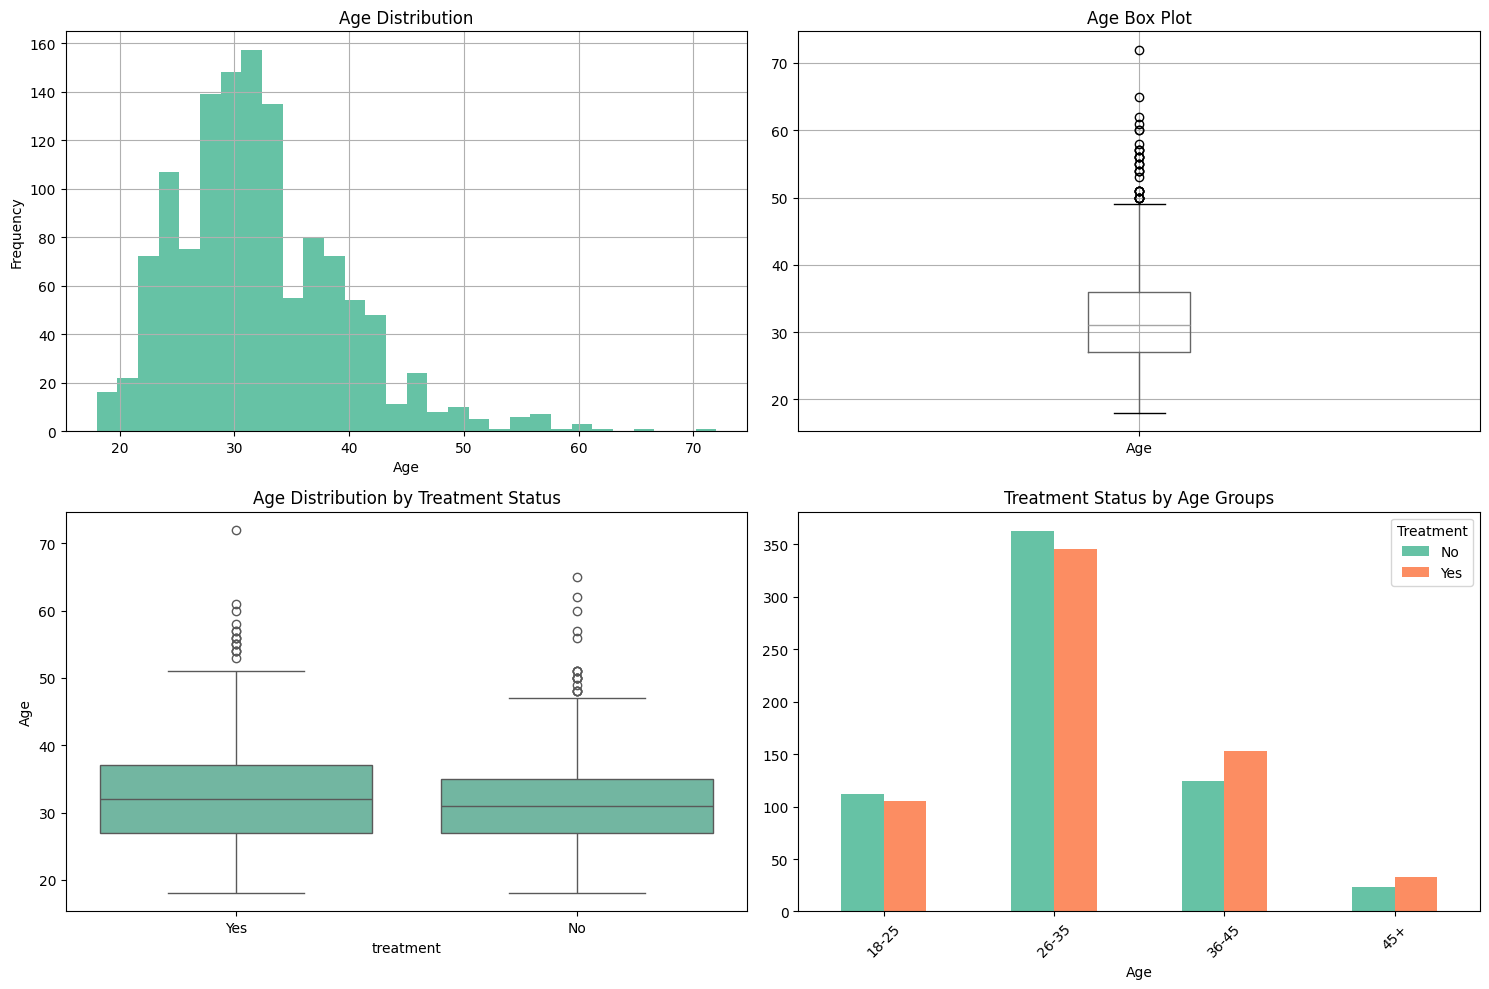

Gender Distribution Analysis:
Gender
Male      983
Female    245
Other      31
Name: count, dtype: int64


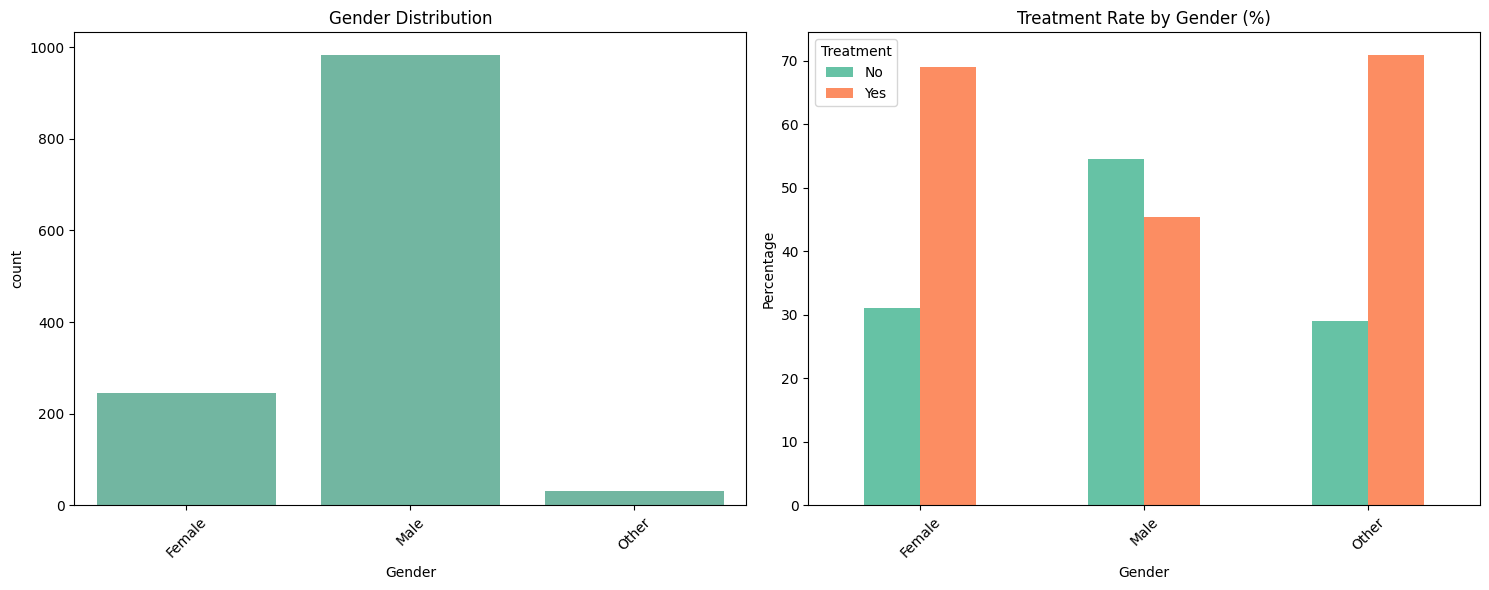


Treatment rates by gender:
treatment         No        Yes
Gender                         
Female     31.020408  68.979592
Male       54.628688  45.371312
Other      29.032258  70.967742
Work-related features found: ['work_interfere', 'remote_work', 'tech_company', 'benefits', 'coworkers']

Analyzing work_interfere:
work_interfere
Sometimes    729
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


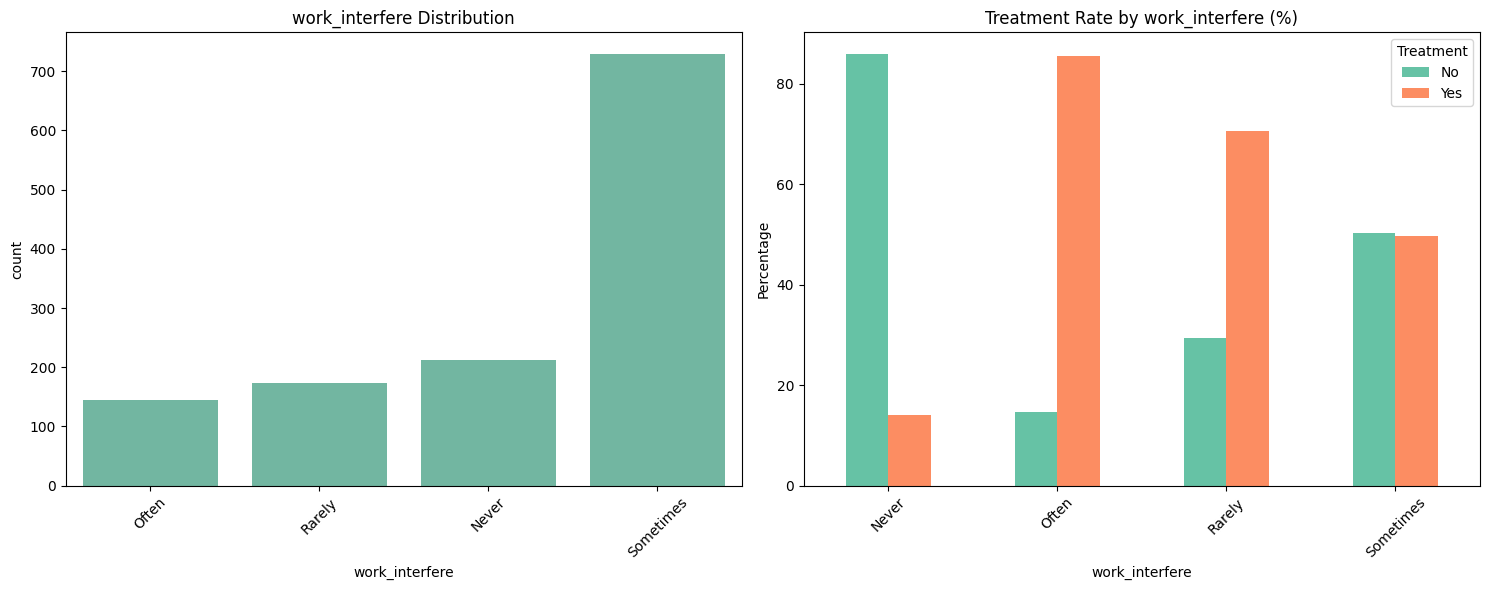


Analyzing remote_work:
remote_work
No     883
Yes    376
Name: count, dtype: int64


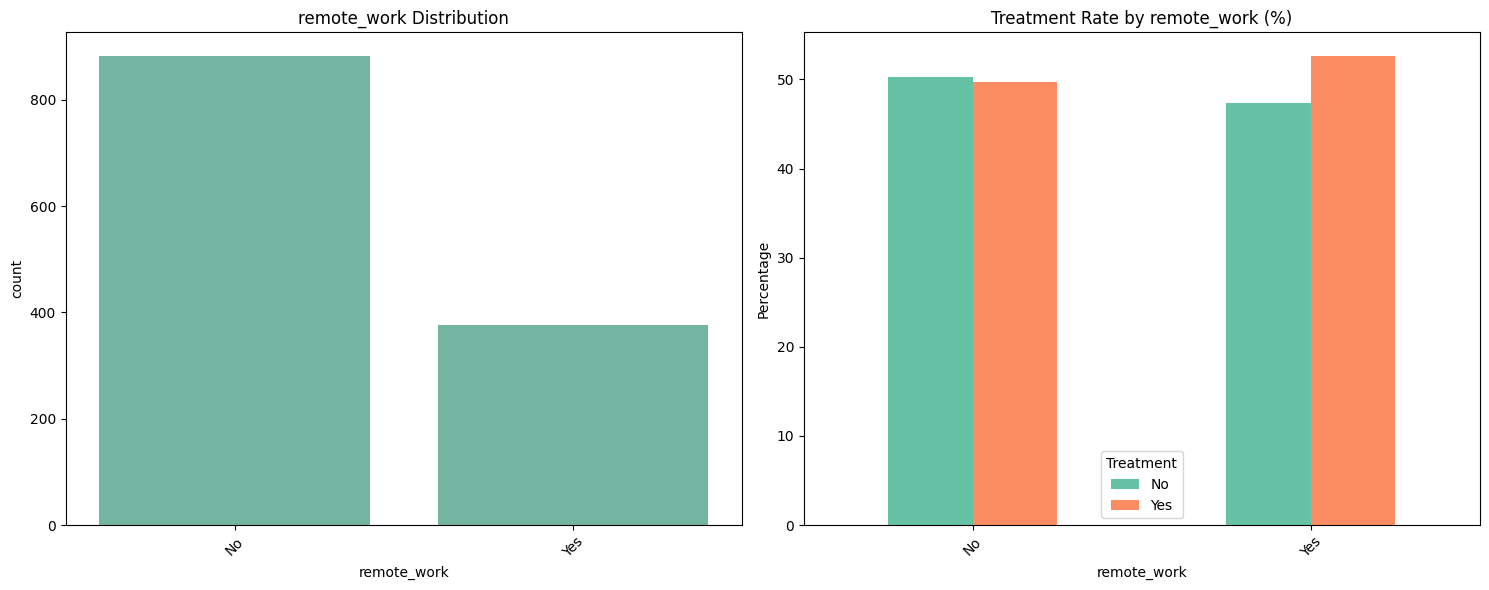


Analyzing tech_company:
tech_company
Yes    1031
No      228
Name: count, dtype: int64


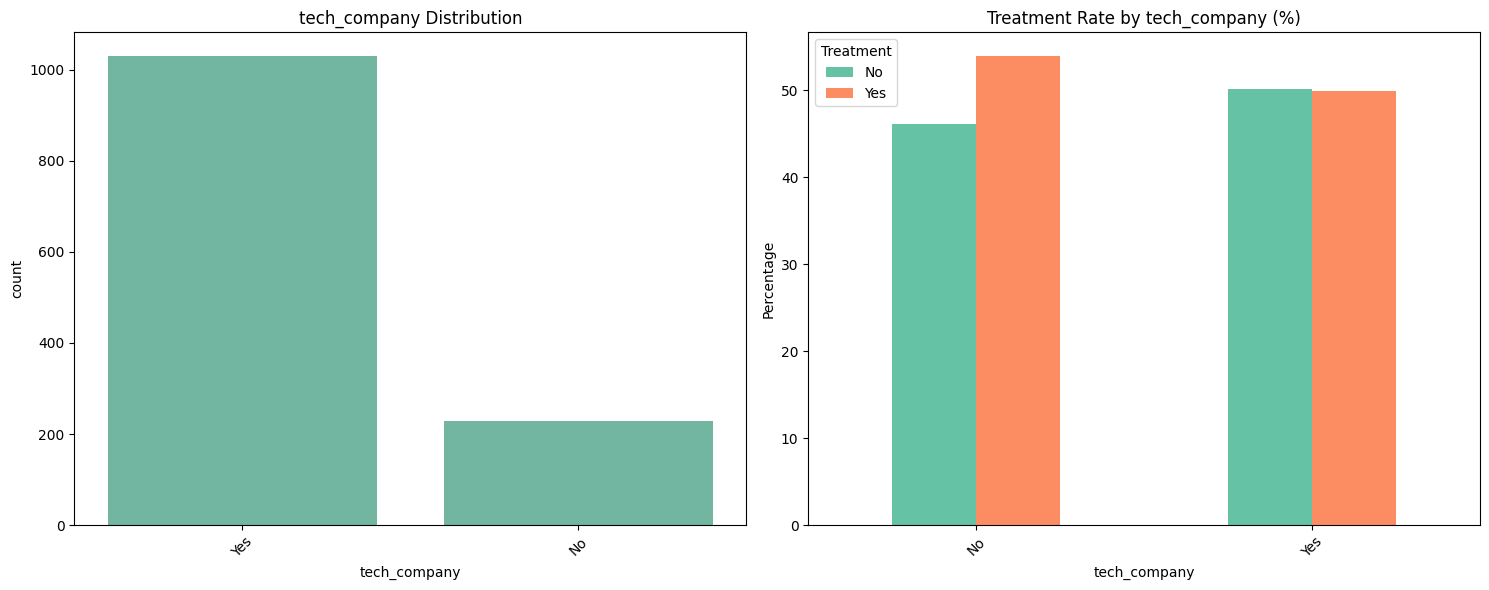


Analyzing benefits:
benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64


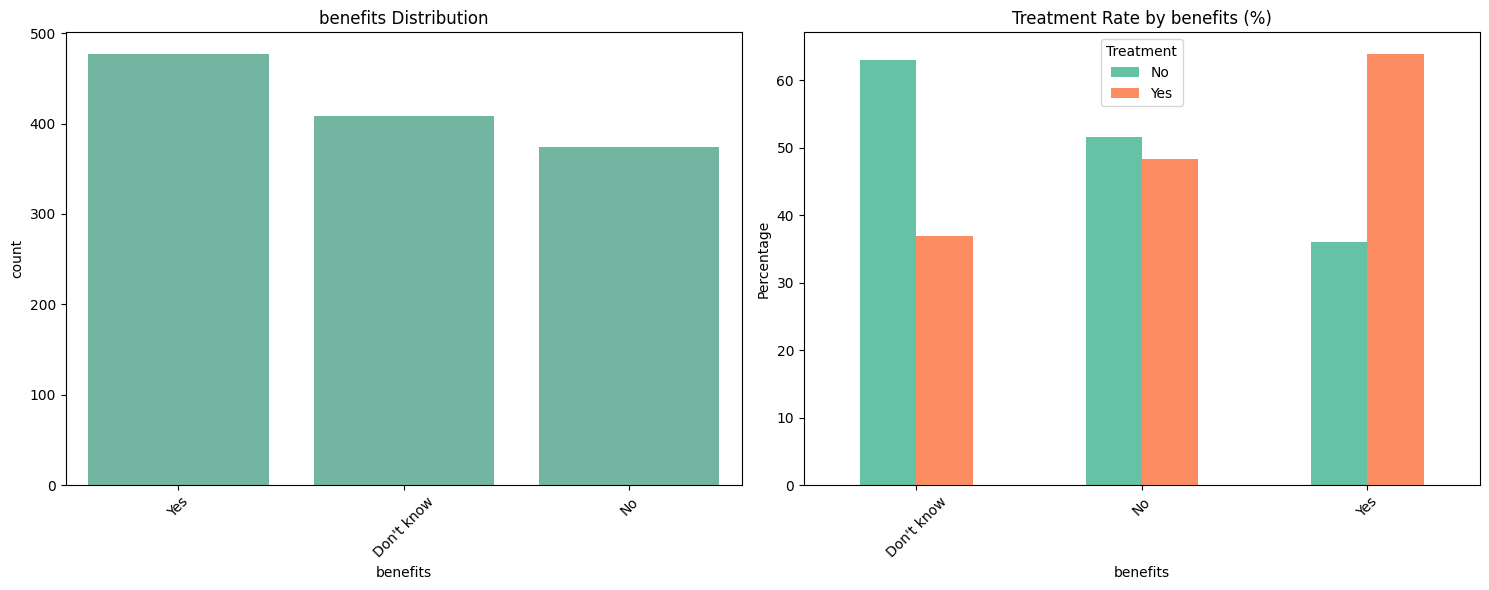

Mental health attitude features: ['anonymity', 'mental_health_consequence', 'mental_health_interview', 'mental_vs_physical']

Analyzing anonymity:
treatment          No        Yes
anonymity                       
Don't know  54.700855  45.299145
No          41.538462  58.461538
Yes         39.200000  60.800000


<Figure size 1200x600 with 0 Axes>

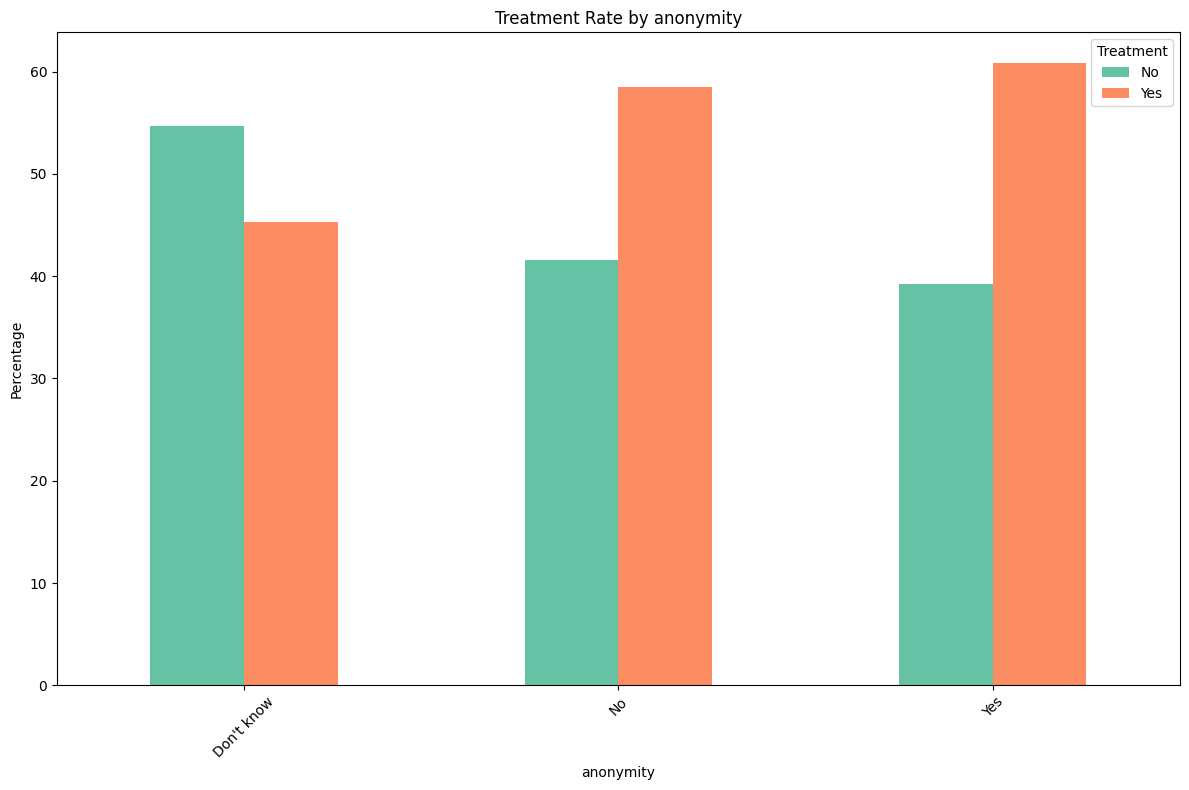


Analyzing mental_health_consequence:
treatment                         No        Yes
mental_health_consequence                      
Maybe                      46.960168  53.039832
No                         57.142857  42.857143
Yes                        40.410959  59.589041


<Figure size 1200x600 with 0 Axes>

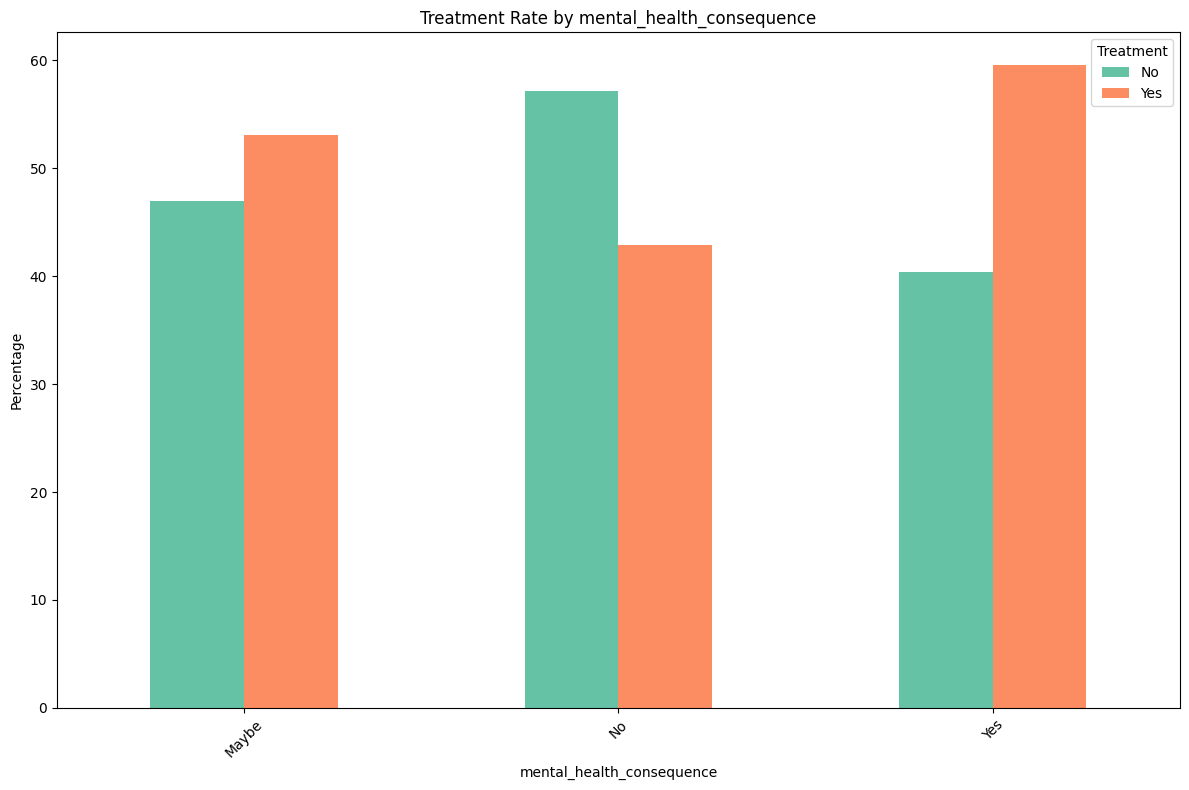


Analyzing mental_health_interview:
treatment                       No        Yes
mental_health_interview                      
Maybe                    60.386473  39.613527
No                       47.519841  52.480159
Yes                      40.909091  59.090909


<Figure size 1200x600 with 0 Axes>

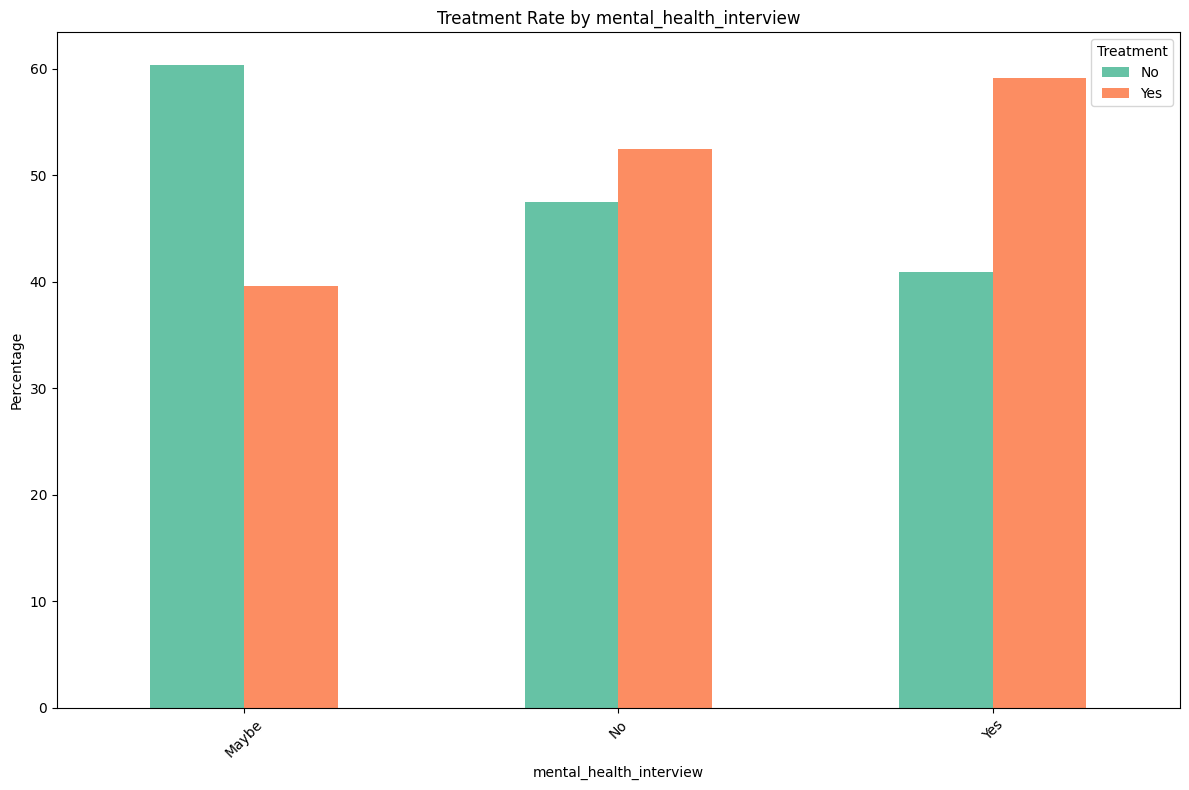

SUMMARY OF KEY INSIGHTS:
1. Dataset contains 1259 samples with 27 features
2. Overall treatment rate: 50.6%
3. Average age of respondents: 32.1 years
4. Most represented gender: Male (78.1%)
5. Number of categorical features: 26
6. Number of numerical features: 1

✅ Exploratory Data Analysis completed!
Next step: Feature Engineering


In [1]:
# exploratory_analysis.py
# ============================================================
# Exploratory Data Analysis (EDA)
# ============================================================
# This script performs comprehensive exploratory data analysis
# on the cleaned Mental Health in Tech Survey dataset.
# ============================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.rcParams['figure.figsize'] = [12, 8]
sns.set_palette('Set2')

# ============================================================
# Load cleaned dataset
# ============================================================
df = pd.read_csv('../data/processed/cleaned_mental_health_data.csv')

print(f"Dataset shape: {df.shape}")
print("\nDataset columns:")
print(list(df.columns))

# ============================================================
# Basic dataset overview
# ============================================================
print("Dataset Overview:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns)}")

print("\nData Types:")
print(df.dtypes.value_counts())

# ============================================================
# Target variable analysis
# ============================================================
if 'treatment' in df.columns:
    print("Target Variable Analysis (Treatment):")
    treatment_counts = df['treatment'].value_counts()
    print(treatment_counts)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.countplot(data=df, x='treatment', ax=ax1)
    ax1.set_title('Treatment Distribution')
    ax1.set_ylabel('Count')

    ax2.pie(treatment_counts.values, labels=treatment_counts.index, autopct='%1.1f%%')
    ax2.set_title('Treatment Distribution (%)')

    plt.tight_layout()
    plt.show()

    balance_ratio = treatment_counts.min() / treatment_counts.max()
    print(f"\nClass balance ratio: {balance_ratio:.3f}")
    if balance_ratio < 0.3:
        print("⚠️ Dataset is imbalanced. Consider using SMOTE or class weighting.")
    else:
        print("✅ Dataset is reasonably balanced.")

# ============================================================
# Age analysis
# ============================================================
if 'Age' in df.columns:
    print("Age Distribution Analysis:")
    print(df['Age'].describe())

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    df['Age'].hist(bins=30, ax=axes[0, 0])
    axes[0, 0].set_title('Age Distribution')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')

    df.boxplot(column='Age', ax=axes[0, 1])
    axes[0, 1].set_title('Age Box Plot')

    if 'treatment' in df.columns:
        sns.boxplot(data=df, x='treatment', y='Age', ax=axes[1, 0])
        axes[1, 0].set_title('Age Distribution by Treatment Status')

        age_groups = pd.cut(df['Age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '45+'])
        age_treatment = pd.crosstab(age_groups, df['treatment'])
        age_treatment.plot(kind='bar', ax=axes[1, 1])
        axes[1, 1].set_title('Treatment Status by Age Groups')
        axes[1, 1].legend(title='Treatment')
        axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# ============================================================
# Gender analysis
# ============================================================
if 'Gender' in df.columns:
    print("Gender Distribution Analysis:")
    gender_counts = df['Gender'].value_counts()
    print(gender_counts)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.countplot(data=df, x='Gender', ax=axes[0])
    axes[0].set_title('Gender Distribution')
    axes[0].tick_params(axis='x', rotation=45)

    if 'treatment' in df.columns:
        gender_treatment = pd.crosstab(df['Gender'], df['treatment'])
        gender_treatment_pct = pd.crosstab(df['Gender'], df['treatment'], normalize='index') * 100

        gender_treatment_pct.plot(kind='bar', ax=axes[1])
        axes[1].set_title('Treatment Rate by Gender (%)')
        axes[1].set_ylabel('Percentage')
        axes[1].legend(title='Treatment')
        axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    if 'treatment' in df.columns:
        print("\nTreatment rates by gender:")
        print(gender_treatment_pct)

# ============================================================
# Work-related features
# ============================================================
work_features = [col for col in df.columns if any(keyword in col.lower() for keyword in
                ['work', 'remote', 'company', 'tech', 'employer', 'benefits'])]

if work_features:
    print(f"Work-related features found: {work_features}")

    for feature in work_features[:4]:
        if feature in df.columns and 'treatment' in df.columns:
            print(f"\nAnalyzing {feature}:")
            feature_counts = df[feature].value_counts()
            print(feature_counts)

            cross_tab = pd.crosstab(df[feature], df['treatment'])
            cross_tab_pct = pd.crosstab(df[feature], df['treatment'], normalize='index') * 100

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            sns.countplot(data=df, x=feature, ax=ax1)
            ax1.set_title(f'{feature} Distribution')
            ax1.tick_params(axis='x', rotation=45)

            cross_tab_pct.plot(kind='bar', ax=ax2)
            ax2.set_title(f'Treatment Rate by {feature} (%)')
            ax2.set_ylabel('Percentage')
            ax2.legend(title='Treatment')
            ax2.tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

# ============================================================
# Correlation analysis
# ============================================================
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    print(f"Numerical columns for correlation: {numerical_cols}")

    corr_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print("\nHigh correlation pairs (>0.7):")
        for pair in high_corr_pairs:
            print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
    else:
        print("\nNo high correlation pairs found.")

# ============================================================
# Mental health attitudes
# ============================================================
attitude_features = [col for col in df.columns if any(keyword in col.lower() for keyword in
                    ['mental', 'discuss', 'consequences', 'comfortable', 'stigma', 'anonymity'])]

if attitude_features:
    print(f"Mental health attitude features: {attitude_features[:5]}")

    if 'treatment' in df.columns:
        for feature in attitude_features[:3]:
            if feature in df.columns:
                print(f"\nAnalyzing {feature}:")
                cross_tab = pd.crosstab(df[feature], df['treatment'])
                cross_tab_pct = pd.crosstab(df[feature], df['treatment'], normalize='index') * 100
                print(cross_tab_pct)

                plt.figure(figsize=(12, 6))
                cross_tab_pct.plot(kind='bar')
                plt.title(f'Treatment Rate by {feature}')
                plt.ylabel('Percentage')
                plt.legend(title='Treatment')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

# ============================================================
# Summary statistics
# ============================================================
print("SUMMARY OF KEY INSIGHTS:")
print("=" * 50)

print(f"1. Dataset contains {len(df)} samples with {len(df.columns)} features")

if 'treatment' in df.columns:
    treatment_rate = df['treatment'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"2. Overall treatment rate: {treatment_rate:.1f}%")

if 'Age' in df.columns:
    avg_age = df['Age'].mean()
    print(f"3. Average age of respondents: {avg_age:.1f} years")

if 'Gender' in df.columns:
    dominant_gender = df['Gender'].value_counts().index[0]
    gender_pct = df['Gender'].value_counts(normalize=True).iloc[0] * 100
    print(f"4. Most represented gender: {dominant_gender} ({gender_pct:.1f}%)")

print(f"5. Number of categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"6. Number of numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")

print("\n✅ Exploratory Data Analysis completed!")
print("Next step: Feature Engineering")
